Импортируем необходимые библиотеки.

In [79]:
from matplotlib.colors import ListedColormap
from sklearn import cross_validation, datasets, metrics, neighbors
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score

import numpy as np

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Генерируем обучающую выборку из описанных двумя признаками объектов четырех классов. 

In [20]:
classification_problem = datasets.make_classification(n_samples=200, n_features =2, n_informative = 2, 
                                                      n_classes = 4, n_redundant=0, 
                                                      n_clusters_per_class=1, random_state=3)

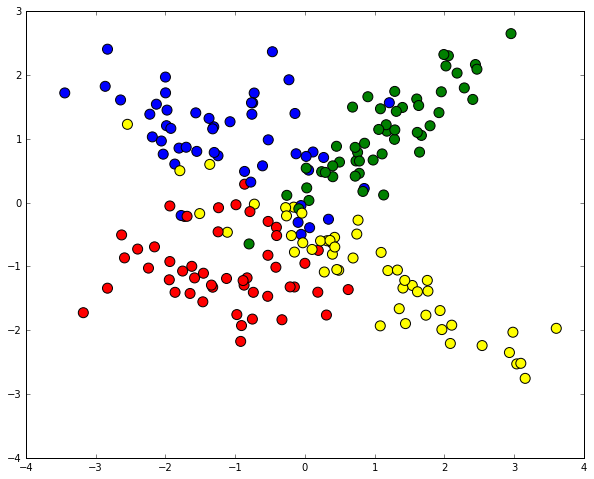

In [21]:
colors = ListedColormap(['red', 'blue', 'yellow', 'green'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow', 'lightgreen'])

pylab.figure(figsize=(10,8))
pylab.scatter(map(lambda x: x[0], classification_problem[0]), map(lambda x: x[1], classification_problem[0]), 
              c=classification_problem[1], cmap=colors, s=100)

Определяем размер тестовой выборки.

In [22]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(classification_problem[0], 
                                                                                     classification_problem[1], 
                                                                                     test_size = 0.3,
                                                                                     random_state = 1)

Решаем задачу классификации с помощью инструментов sklearn.

Сперва определяем функции для построения и визуализации разделяющей поверхности.

In [23]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [24]:
def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, 
                          colors = colors, light_colors = light_colors):
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    pyplot.figure(figsize = (16, 6))
    
    #plot decision surface on the train data 
    pyplot.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors)
    pyplot.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_labels, estimator.predict(train_data))))
    
    #plot decision surface on the test data
    pyplot.subplot(1,2,2)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 100, cmap = colors)
    pyplot.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(test_labels, estimator.predict(test_data))))

In [18]:
def show_decision(num):
    estimator = neighbors.KNeighborsClassifier(n_neighbors=num)

    plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)
    
    accuracy = metrics.accuracy_score(test_labels, estimator.predict(test_data))
    
    return accuracy

Построим разделяющие поверхности, получаемые при решении задачи классификации методом kNN при разных k.

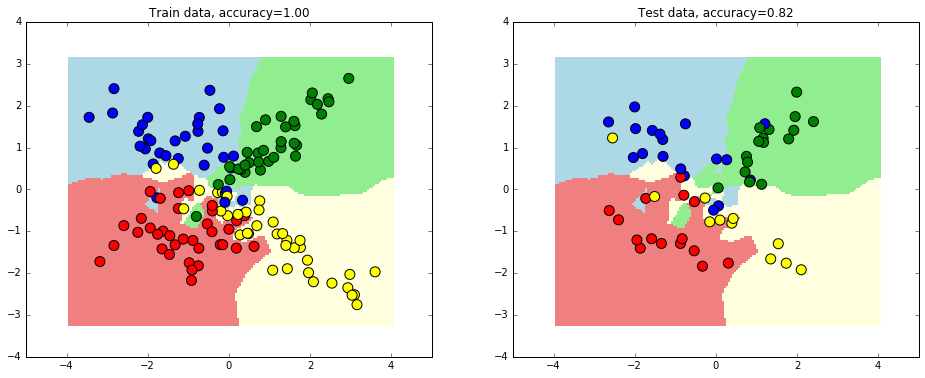

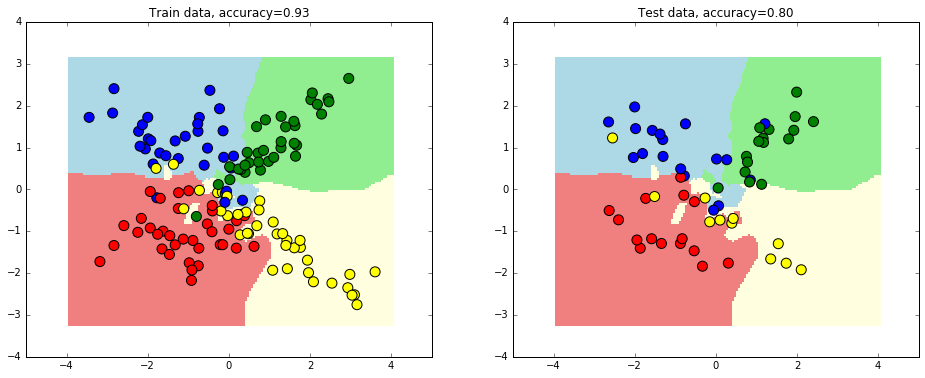

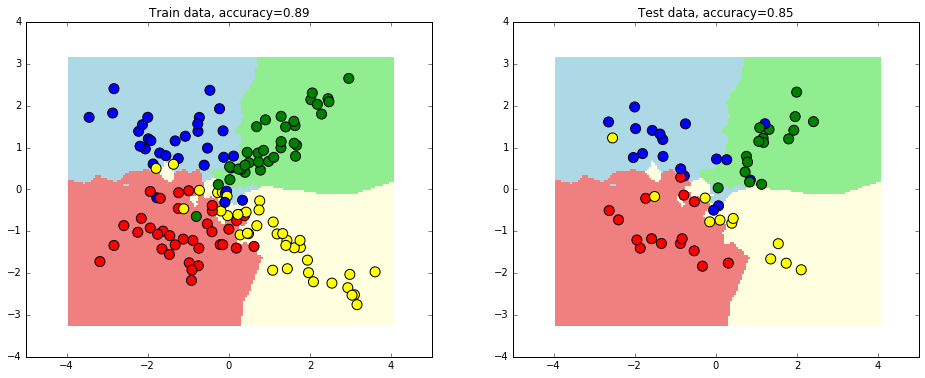

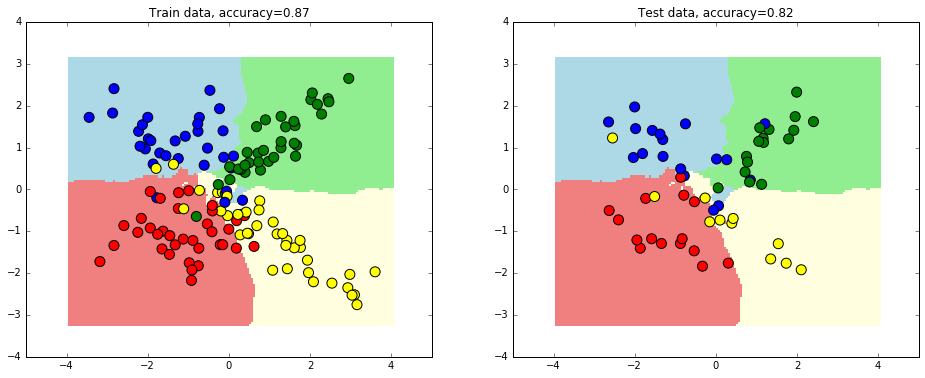

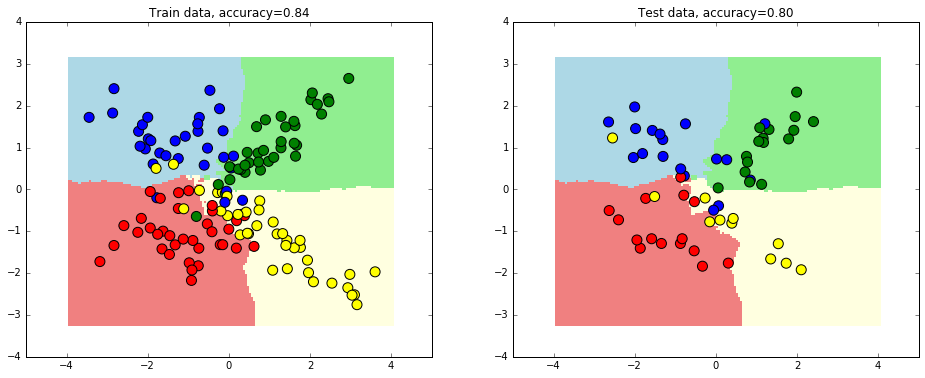

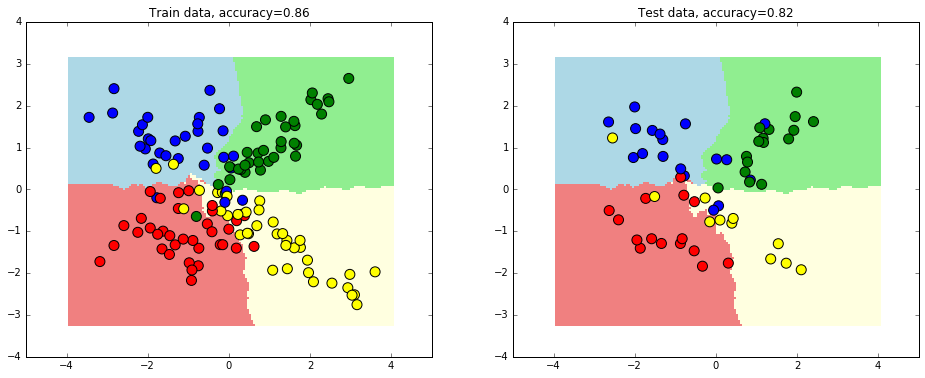

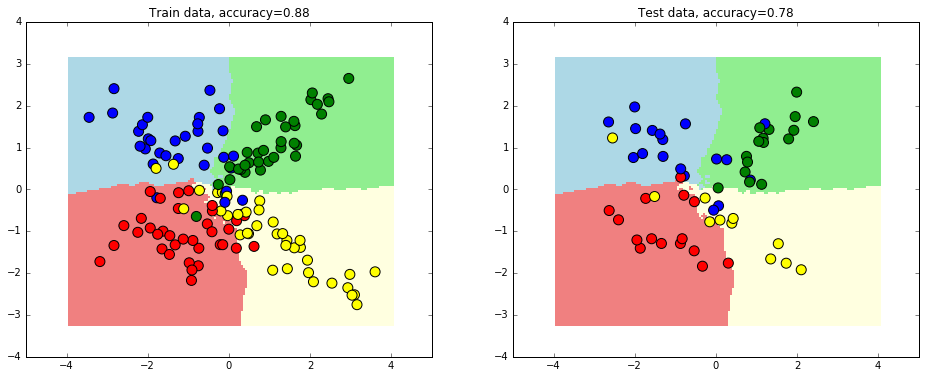

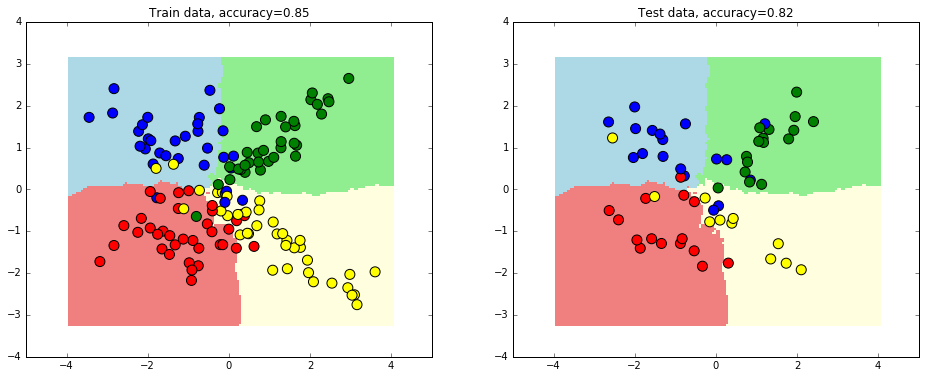

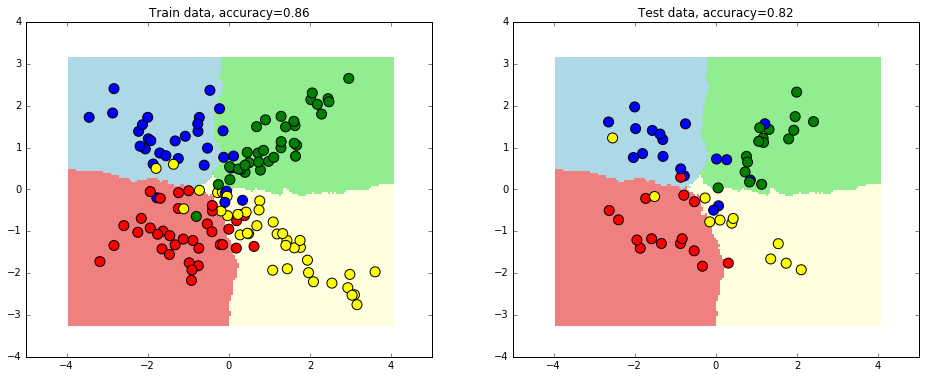

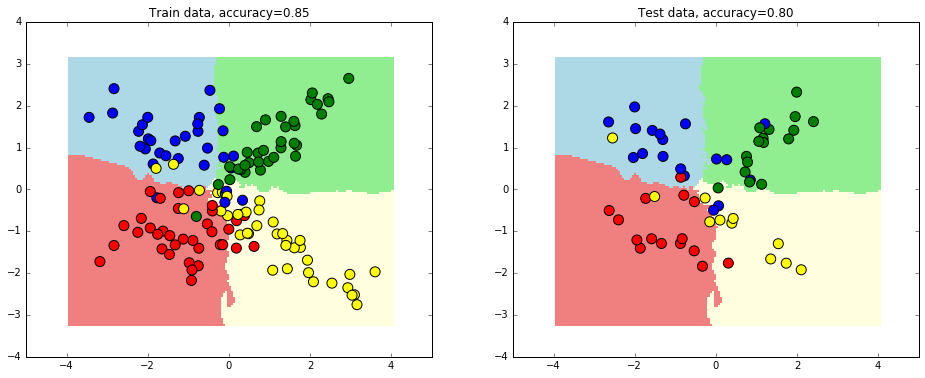

In [63]:
X = np.array([1, 2, 3, 5, 11, 15, 21, 31, 41, 51])
Y = np.zeros(X.size)

for i in range (X.size):
    Y[i] = show_decision(X[i])

Построим график зависимости accuracy от количества соседей.

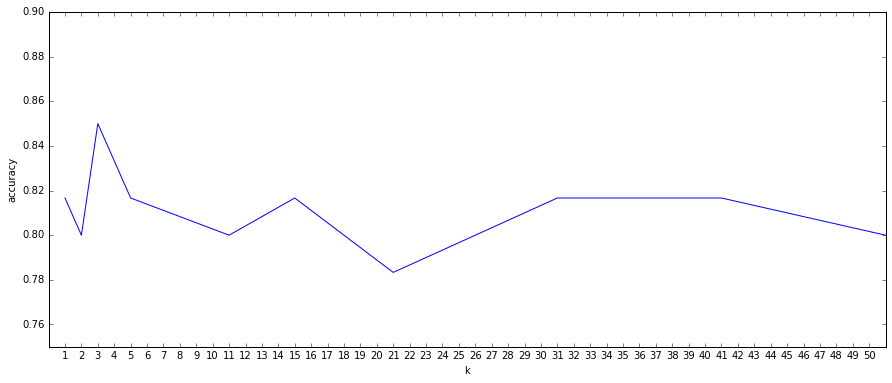

In [89]:
fig = plt.figure(figsize=(15,6))

plt.plot(X, Y)

axis = fig.gca()
axis.set_xlim(0, np.max(X))
axis.set_ylim(0.75, 0.90)

plt.xlabel("k")
plt.ylabel("accuracy")

plt.xticks(n_neighbors)

plt.show()

Теперь будем подбирать оптимальное значение k с помощью 5-fold cross-validation.

In [80]:
def cv_nn(n_neighbors, X, y):
    average_scores = []
    cv = KFold(X.shape[0], n_folds=5, shuffle=True, random_state=42)
    for k in n_neighbors:
        estimator = neighbors.KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(estimator, X, y, cv=cv)
        average_scores.append(scores.mean())
    return average_scores

In [81]:
n_neighbors = range(1, 51)
average_scores = cv_nn(n_neighbors, classification_problem[0], classification_problem[1])

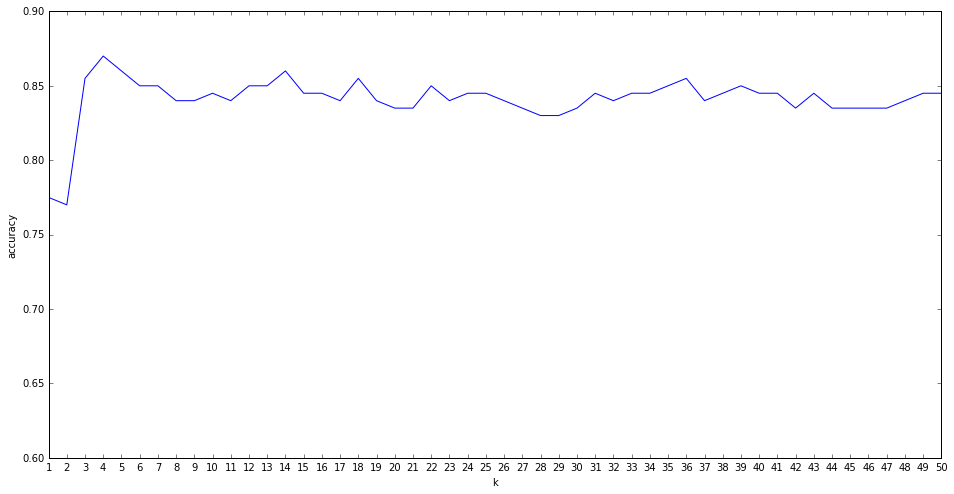

In [86]:
plt.figure(figsize=(16, 8))
l1 = plt.plot(n_neighbors, average_scores)

plt.xlim(np.min(n_neighbors), np.max(n_neighbors))
plt.ylim(0.6, 0.9)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.xticks(n_neighbors)

plt.show()

Как можно видеть из графика, оптимальное значение количества соседей в методе kNN - это 5.